In [54]:

# import the libraries
# --------------------
import pandas as pd
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.externals.six import StringIO  # to view of decision tree
from IPython.display import Image
# !pip install pydotplus
import seaborn as sns
import pydotplus
# !pip install pandas_ml
from pandas_ml import ConfusionMatrix

In [2]:
movie = pd.read_csv("D:\\Imarticus\\Python\\movierating.csv", encoding='cp1252')
movie.head()

,id,name,display_name,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category
0,7950115,Avatar,Avatar,2009,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,"For intense epic battle sequences and warfare,...",PG-13,Wide,2784,9
1,50950115,Harry Potter and the Deathly Hallows: Part II,Harry Potter and the Deathly Hallows: Part II,2011,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for some sequences of intense action violence ...,PG-13,Wide,1328,9
2,119870115,Transformers 3,Transformers: Dark of the Moon,2011,1,Science Fiction,Based on TV,Animation/Live Action,Action,English,for intense prolonged sequences of sci-fi acti...,PG-13,Wide,1124,9
3,119590115,Toy Story 3,Toy Story 3,2010,1,Kids Fiction,Original Screenplay,Digital Animation,Adventure,English,General,G,Wide,1064,9
4,91700115,Pirates of the Caribbean 4,Pirates of the Caribbean: On Stranger Tides,2011,1,Fantasy,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13,Wide,1044,9


In [3]:
# number of rows
# --------------------
len(movie)


1196

In [4]:
# print the columns
# --------------------
col = list(movie.columns)
print(col)

['id', 'name', 'display_name', 'production_year', 'movie_sequel', 'creative_type', 'source', 'production_method', 'genre', 'language', 'board_rating_reason', 'movie_board_rating_display_name', 'movie_release_pattern_display_name', 'total', 'Category']


In [5]:

# count of Rows and Columns
# -------------------------
movie.shape

(1196, 15)

In [6]:
# describe the dataset (R,C)
# --------------------------
movie.dtypes

import numpy as np

for c in cols:
    if (np.issubdtype(movie[c].dtype,np.number) == False):
        print("WARNING: Column '{}' has special characters".format(c))

    if (len(movie[c][movie[c].isnull()])) > 0:
        print("WARNING: Column '{}' has NULL values".format(c))

    if (len(movie[c][movie[c] == 0])) > 0:
        print("WARNING: Column '{}' has value = 0".format(c))
        

id                                     int64
name                                  object
display_name                          object
production_year                        int64
movie_sequel                           int64
creative_type                         object
source                                object
production_method                     object
genre                                 object
language                              object
board_rating_reason                   object
movie_board_rating_display_name       object
movie_release_pattern_display_name    object
total                                  int64
Category                               int64
dtype: object

In [7]:
# check for NULLS, blanks and zeroes
# -------------------------------
cols = list(movie.columns)

print(cols)

['id', 'name', 'display_name', 'production_year', 'movie_sequel', 'creative_type', 'source', 'production_method', 'genre', 'language', 'board_rating_reason', 'movie_board_rating_display_name', 'movie_release_pattern_display_name', 'total', 'Category']


In [8]:
import numpy as np

for c in cols:
    if (np.issubdtype(movie[c].dtype,np.number) == False):
        print("WARNING: Column '{}' has special characters".format(c))

    if (len(movie[c][movie[c].isnull()])) > 0:
        print("WARNING: Column '{}' has NULL values".format(c))

    if (len(movie[c][movie[c] == 0])) > 0:
        print("WARNING: Column '{}' has value = 0".format(c))
        

In [9]:
# to find the correlation among variables (Multicollinearity)
# ----------------------------------------------------------
movie.corr()
lencol=len(cols); print(lencol)
cor = movie.iloc[:,0:lencol].corr()
print(cor)

15
                       id  production_year  movie_sequel     total  Category
id               1.000000         0.537046     -0.002964 -0.073668 -0.081658
production_year  0.537046         1.000000      0.032073  0.073020  0.067235
movie_sequel    -0.002964         0.032073      1.000000  0.381807  0.339997
total           -0.073668         0.073020      0.381807  1.000000  0.805497
Category        -0.081658         0.067235      0.339997  0.805497  1.000000


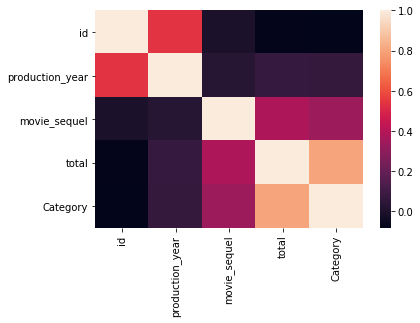

In [10]:
# correlation using visualization
# -------------------------------
# cor --> defined above as the correlation amongst the x-variables
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns)


In [11]:
# drop unwanted columns
# --------------------
movie = movie.drop(['id','display_name','name','board_rating_reason',],axis=1)

In [12]:
# Get all the factor X-variables
# --------------------------------------
movie.dtypes


production_year                        int64
movie_sequel                           int64
creative_type                         object
source                                object
production_method                     object
genre                                 object
language                              object
movie_board_rating_display_name       object
movie_release_pattern_display_name    object
total                                  int64
Category                               int64
dtype: object

In [13]:

factor_x = movie.select_dtypes(exclude=["int64","float64","category"]).columns.values
print(factor_x)

['creative_type' 'source' 'production_method' 'genre' 'language'
 'movie_board_rating_display_name' 'movie_release_pattern_display_name']


In [14]:
# Unique values of all Factor variables
# --------------------------------------
for c in factor_x:
    print("Factor variable = '" + c + "'")
    print(movie[c].unique())
    print("***")


Factor variable = 'creative_type'
['Science Fiction' 'Fantasy' 'Kids Fiction' 'Super Hero'
 'Historical Fiction' 'Contemporary Fiction' 'Dramatization' 'Factual'
 'Multiple Creative Types']
***
Factor variable = 'source'
['Original Screenplay' 'Based on Fiction Book/Short Story' 'Based on TV'
 'Based on Theme Park Ride' 'Based on Comic/Graphic Novel'
 'Based on Factual Book/Article' 'Based on Musical or Opera'
 'Based on Folk Tale/Legend/Fairytale' 'Spin-Off' 'Remake' 'Based on Game'
 'Based on Toy' 'Based on Real Life Events' 'Based on Short Film'
 'Based on Play' 'Compilation']
***
Factor variable = 'production_method'
['Animation/Live Action' 'Digital Animation' 'Live Action'
 'Hand Animation' 'Stop-Motion Animation' 'Multiple Production Methods']
***
Factor variable = 'genre'
['Action' 'Adventure' 'Thriller/Suspense' 'Drama' 'Comedy' 'Musical'
 'Horror' 'Romantic Comedy' 'Western' 'Documentary' 'Black Comedy'
 'Concert/Performance' 'Multiple Genres']
***
Factor variable = 'language

In [15]:
# convert all X-categorical variables
# ---------------------------------
for c in factor_x:
    movie[c] = movie[c].astype('category',copy=False)
movie.dtypes


production_year                          int64
movie_sequel                             int64
creative_type                         category
source                                category
production_method                     category
genre                                 category
language                              category
movie_board_rating_display_name       category
movie_release_pattern_display_name    category
total                                    int64
Category                                 int64
dtype: object

In [16]:
# get the counts of the classes
# ----------------------------
print(movie.production_year.value_counts())
print(movie.movie_sequel.value_counts())
print(movie.creative_type.value_counts())
print(movie.source.value_counts())
print(movie.production_method.value_counts())
print(movie.genre.value_counts())
print(movie.language.value_counts())
print(movie.movie_board_rating_display_name.value_counts())
print(movie.movie_release_pattern_display_name.value_counts())
print(movie.total.value_counts())
print(movie.Category.value_counts())


2010    267
2009    252
2007    238
2008    229
2011    210
Name: production_year, dtype: int64
0    1079
1     117
Name: movie_sequel, dtype: int64
Contemporary Fiction       638
Fantasy                    131
Historical Fiction         100
Dramatization               95
Science Fiction             89
Factual                     60
Kids Fiction                59
Super Hero                  20
Multiple Creative Types      4
Name: creative_type, dtype: int64
Original Screenplay                    629
Based on Fiction Book/Short Story      218
Based on Real Life Events              128
Remake                                  65
Based on TV                             38
Based on Comic/Graphic Novel            36
Based on Factual Book/Article           23
Based on Play                           21
Based on Folk Tale/Legend/Fairytale     10
Based on Game                            8
Spin-Off                                 5
Based on Short Film                      4
Based on Musical or Op

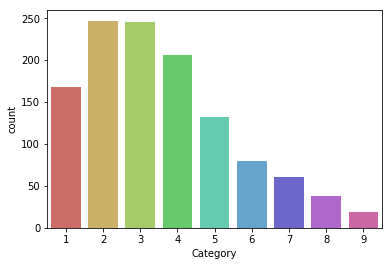

In [19]:
# plot the Category
# --------------------------------------
sns.countplot(x='Category', data=movie, palette='hls')


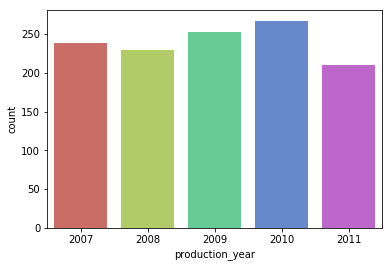

In [20]:
sns.countplot(x='production_year', data=movie, palette='hls')



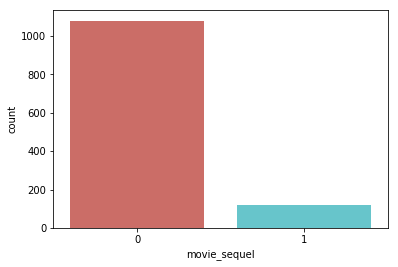

In [21]:
sns.countplot(x='movie_sequel', data=movie, palette='hls')


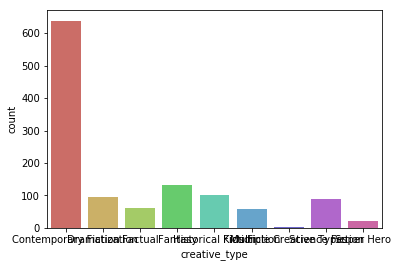

In [22]:
sns.countplot(x='creative_type', data=movie, palette='hls')


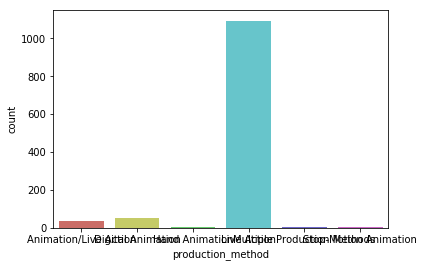

In [23]:
sns.countplot(x='production_method', data=movie, palette='hls')



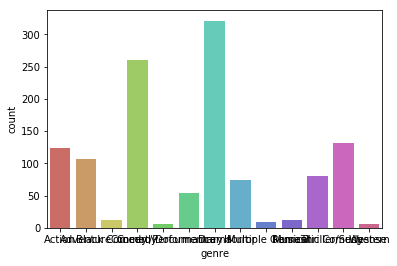

In [24]:
sns.countplot(x='genre', data=movie, palette='hls')


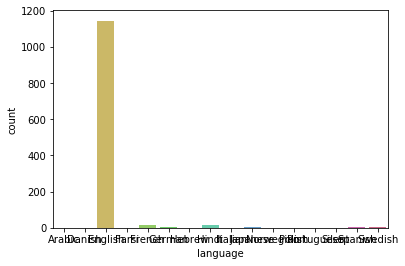

In [25]:
sns.countplot(x='language', data=movie, palette='hls')


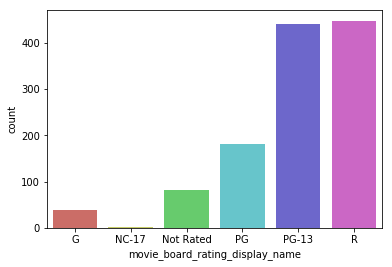

In [26]:
sns.countplot(x='movie_board_rating_display_name', data=movie, palette='hls')


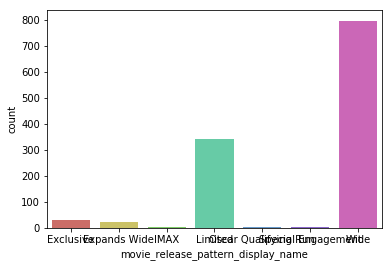

In [29]:
sns.countplot(x='movie_release_pattern_display_name', data=movie, palette='hls')


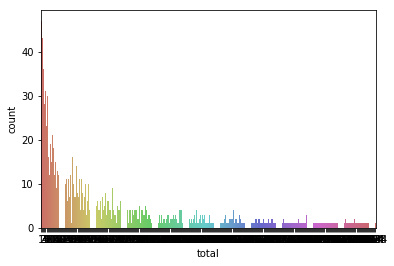

In [28]:
sns.countplot(x='total', data=movie, palette='hls')

In [30]:
# create the dummy variables
# for every column having more than 1 value, 
# create dummy variables
# this is done since there are characters in the factor variables
# ---------------------------------------------------------------

print(factor_x)


['creative_type' 'source' 'production_method' 'genre' 'language'
 'movie_board_rating_display_name' 'movie_release_pattern_display_name']


In [31]:
new_movie = movie.copy()

# del cat_list

for var in factor_x:
    cat_list = pd.get_dummies(movie[var], drop_first=True, prefix=var)
    new_movie = new_movie.join(cat_list)

new_movie.shape

(1196, 77)

In [32]:
# old+dummy columns
new_col_set = new_movie.columns
print(new_col_set)
len(new_col_set)


Index(['production_year', 'movie_sequel', 'creative_type', 'source',
       'production_method', 'genre', 'language',
       'movie_board_rating_display_name', 'movie_release_pattern_display_name',
       'total', 'Category', 'creative_type_Dramatization',
       'creative_type_Factual', 'creative_type_Fantasy',
       'creative_type_Historical Fiction', 'creative_type_Kids Fiction',
       'creative_type_Multiple Creative Types',
       'creative_type_Science Fiction', 'creative_type_Super Hero',
       'source_Based on Factual Book/Article',
       'source_Based on Fiction Book/Short Story',
       'source_Based on Folk Tale/Legend/Fairytale', 'source_Based on Game',
       'source_Based on Musical or Opera', 'source_Based on Play',
       'source_Based on Real Life Events', 'source_Based on Short Film',
       'source_Based on TV', 'source_Based on Theme Park Ride',
       'source_Based on Toy', 'source_Compilation',
       'source_Original Screenplay', 'source_Remake', 'source_Spin

77

In [33]:

# data with new columns
new_movie.head()


,production_year,movie_sequel,creative_type,source,production_method,genre,language,movie_board_rating_display_name,movie_release_pattern_display_name,total,...,movie_board_rating_display_name_Not Rated,movie_board_rating_display_name_PG,movie_board_rating_display_name_PG-13,movie_board_rating_display_name_R,movie_release_pattern_display_name_Expands Wide,movie_release_pattern_display_name_IMAX,movie_release_pattern_display_name_Limited,movie_release_pattern_display_name_Oscar Qualifying Run,movie_release_pattern_display_name_Special Engagement,movie_release_pattern_display_name_Wide
0,2009,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,PG-13,Wide,2784,...,0,0,1,0,0,0,0,0,0,1
1,2011,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,PG-13,Wide,1328,...,0,0,1,0,0,0,0,0,0,1
2,2011,1,Science Fiction,Based on TV,Animation/Live Action,Action,English,PG-13,Wide,1124,...,0,0,1,0,0,0,0,0,0,1
3,2010,1,Kids Fiction,Original Screenplay,Digital Animation,Adventure,English,G,Wide,1064,...,0,0,0,0,0,0,0,0,0,1
4,2011,1,Fantasy,Based on Theme Park Ride,Live Action,Adventure,English,PG-13,Wide,1044,...,0,0,1,0,0,0,0,0,0,1


In [34]:
# get the difference of new and old columns
to_keep = list(set(new_col_set).difference(set(factor_x)))
to_keep
to_keep.sort()
to_keep
len(to_keep)

70

In [35]:
# create the final dataset with the final columns set
# ---------------------------------------------------
movie_final = new_movie[to_keep]
movie_final.head(4)
movie_final.columns.sort_values()
len(movie_final.columns)



70

In [36]:
# reordering the columns
# ---------------------------------------------------
movie_final = pd.concat(
        [movie_final['Category'], 
        movie_final.drop('Category',axis=1)],
        axis=1)

movie_final.columns

Index(['Category', 'creative_type_Dramatization', 'creative_type_Factual',
       'creative_type_Fantasy', 'creative_type_Historical Fiction',
       'creative_type_Kids Fiction', 'creative_type_Multiple Creative Types',
       'creative_type_Science Fiction', 'creative_type_Super Hero',
       'genre_Adventure', 'genre_Black Comedy', 'genre_Comedy',
       'genre_Concert/Performance', 'genre_Documentary', 'genre_Drama',
       'genre_Horror', 'genre_Multiple Genres', 'genre_Musical',
       'genre_Romantic Comedy', 'genre_Thriller/Suspense', 'genre_Western',
       'language_Danish', 'language_English', 'language_Farsi',
       'language_French', 'language_German', 'language_Hebrew',
       'language_Hindi', 'language_Italian', 'language_Japanese',
       'language_Norwegian', 'language_Polish', 'language_Portuguese',
       'language_Silent', 'language_Spanish', 'language_Swedish',
       'movie_board_rating_display_name_NC-17',
       'movie_board_rating_display_name_Not Rated',
   

In [37]:
import random as r
r.seed(100)



# split the dataset into train and test
# ---------------------------------------------------
train, test = train_test_split(movie_final, test_size = 0.3)

print(train.shape)


(837, 70)


In [38]:
print(test.shape)

(359, 70)


In [39]:
total_cols=len(movie_final.columns)
print(total_cols)

70


In [45]:
# split the train and test into X and Y variables
train_x = train.iloc[:,1:total_cols+1]
train_y = train.iloc[:,0]
train_x.iloc[0:5]

test_x  = test.iloc[:,1:total_cols+1]
test_y = test.iloc[:,0]

In [46]:
 # # predict
# --------
pred1 = rf1.predict(test_x)

# print some predictions
# -----------------------
for i in range(50):
    print("Actual value = {}, Predicted value = {}".format(test_y.iloc[i], pred1[i]))




Actual value = 6, Predicted value = 6
Actual value = 9, Predicted value = 9
Actual value = 4, Predicted value = 4
Actual value = 3, Predicted value = 3
Actual value = 2, Predicted value = 1
Actual value = 4, Predicted value = 4
Actual value = 6, Predicted value = 6
Actual value = 3, Predicted value = 3
Actual value = 1, Predicted value = 1
Actual value = 3, Predicted value = 3
Actual value = 3, Predicted value = 3
Actual value = 7, Predicted value = 7
Actual value = 6, Predicted value = 4
Actual value = 3, Predicted value = 3
Actual value = 5, Predicted value = 5
Actual value = 8, Predicted value = 8
Actual value = 2, Predicted value = 3
Actual value = 5, Predicted value = 5
Actual value = 5, Predicted value = 5
Actual value = 5, Predicted value = 4
Actual value = 2, Predicted value = 2
Actual value = 1, Predicted value = 1
Actual value = 5, Predicted value = 5
Actual value = 2, Predicted value = 2
Actual value = 1, Predicted value = 1
Actual value = 9, Predicted value = 9
Actual value

In [47]:
# print the accuracy
# ------------------
print("Test Accuracy  :: ", accuracy_score(test_y, pred1))



Test Accuracy  ::  0.7883008356545961


C:\Users\Pranit\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\abstract.py:66: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  df = df.loc[idx, idx.copy()].fillna(0)  # if some columns or rows are missing
C:\Users\Pranit\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


Predicted   1   2   3   4   5  6  7  8  9  __all__
Actual                                            
1           0   0   0   0   0  0  0  0  0        0
2           0   0   0   0   0  0  0  0  0        0
3           0   0   0   0   0  0  0  0  0        0
4           0   1   2   2   1  1  0  0  0        7
5           6  13   6  16   3  2  0  3  0       49
6           2   2   5   9   3  0  2  0  0       23
7           2   6   5   3   0  1  1  1  0       19
8           3   3   0   0   3  2  1  0  0       12
9           1   0   2   1   1  1  1  0  0        7
__all__    14  25  20  31  11  7  5  4  0      117


C:\Users\Pranit\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:191: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.P)
C:\Users\Pranit\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:276: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FN) / self.P)
C:\Users\Pranit\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:302: RuntimeWarning: invalid value encountered in true_divide
  * (self.TN + self.FP) * (self.TN + self.FN)))
C:\Users\Pranit\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:236: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.PositiveTest)
C:\Users\Pranit\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:267: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FP) / self.PositiveTest)
C:\Users\Pranit\Anaconda3\lib\site-packages\pandas_ml\confusio

Confusion Matrix:

Predicted   1   2   3   4   5  6  7  8  9  __all__
Actual                                            
1           0   0   0   0   0  0  0  0  0        0
2           0   0   0   0   0  0  0  0  0        0
3           0   0   0   0   0  0  0  0  0        0
4           0   1   2   2   1  1  0  0  0        7
5           6  13   6  16   3  2  0  3  0       49
6           2   2   5   9   3  0  2  0  0       23
7           2   6   5   3   0  1  1  1  0       19
8           3   3   0   0   3  2  1  0  0       12
9           1   0   2   1   1  1  1  0  0        7
__all__    14  25  20  31  11  7  5  4  0      117


Overall Statistics:

Accuracy: 0.05128205128205128
95% CI: (0.01904954993661567, 0.10828011653750047)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.9999999997356002
Kappa: -0.028347454271913847
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                       1         2        3  \
Population                                  117   

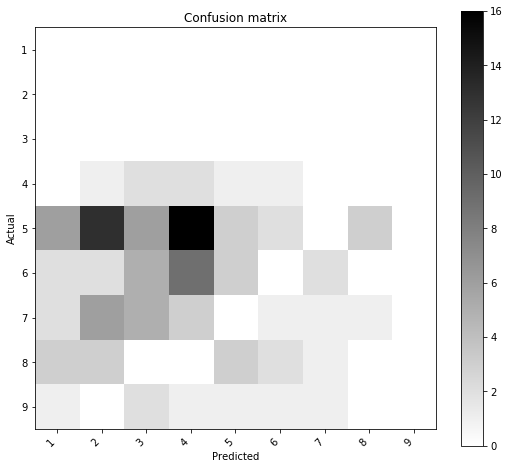

In [50]:
# confusion matrix
# -----------------
cm=ConfusionMatrix(test_y, pred1)
print(cm)
cm.plot()
cm.print_stats()
